In [45]:
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm.notebook import tqdm

In [46]:
filename = '/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/dm20.000_sin2thetasquare0.000_Ev750keV_dist10cm_3cmbin.txt'
arr0 = np.loadtxt(filename)
N_fit_null = arr0[:, 0]
chi2min_fit_null = arr0[:, 1]


In [57]:
# test one dataset:
dm2, sin2 = 0.910, 0.202
filename = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/dm2{dm2:.3f}_sin2thetasquare{sin2:.3f}_Ev750keV_dist10cm_3cmbin.txt'
arr0 = np.loadtxt(filename)
N_fit_test1 = arr0[:, 0]
chi2min_fit_test1 = arr0[:, 1]


Text(0.5, 0, '$\\chi^2_{min} - \\chi^2_{null}$')

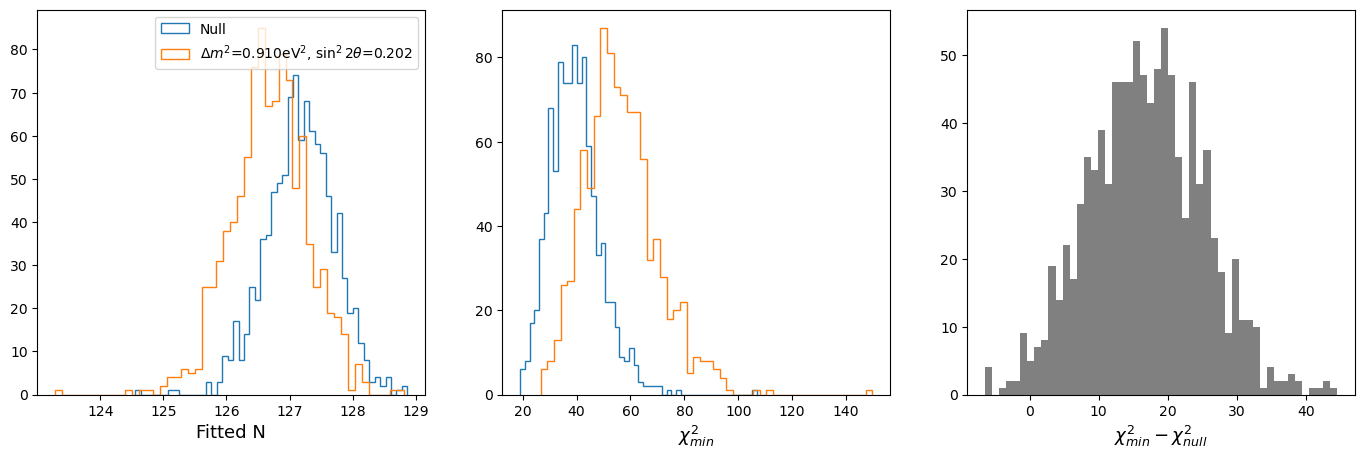

In [58]:

fig, ax = plt.subplots(1, 3, figsize=(17, 5))
ax[0].hist(N_fit_null, bins=50, histtype='step', label='Null')
ax[0].hist(N_fit_test1, bins=50, histtype='step', label=r'$\Delta m^2$'+f'={dm2:.3f}' + 'eV$^2$' + r', $\sin^22\theta$'+f'={sin2:.3f}')
ax[0].legend()
ax[0].set_xlabel('Fitted N', fontsize=13)

ax[1].hist(chi2min_fit_null, bins=50, histtype='step')
ax[1].hist(chi2min_fit_test1, bins=50, histtype='step')
ax[1].set_xlabel(r'$\chi^2_{min}$', fontsize=13)

ax[2].hist(chi2min_fit_test1 - chi2min_fit_null, bins=50, color='gray')
ax[2].set_xlabel(r'$\chi^2_{min} - \chi^2_{null}$', fontsize=13)


In [20]:
delta_chi2min_median = np.zeros((50, 50))

for i, dm2 in enumerate(np.logspace(-2, 1, 50)):
    for j, sin2 in enumerate(np.logspace(-2, 0, 50)):
        filename = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/dm2{dm2:.3f}_sin2thetasquare{sin2:.3f}_Ev750keV_dist10cm_3cmbin.txt'
        if not os.path.exists(filename):
            print(f'{filename} dose not exist !')
            continue
        else:
            arr = np.loadtxt(filename)
            chi2min = arr[:, 1]
            delta_chi2min_median[i, j] = np.abs( np.median( chi2min - chi2min_fit_null ) )
            #delta_chi2min_median[50-i-1, j] = np.median( chi2min - chi2min_fit_null )
            if j == 40:
                if i == 10 or i ==20 or i==30 or i==40:
                    print(dm2, sin2, np.median( chi2min - chi2min_fit_null ))


0.040949150623804255 0.42919342601287763 0.09520093917040384
0.16768329368110083 0.42919342601287763 0.8688518050572327
0.6866488450043002 0.42919342601287763 106.3092084653872
2.8117686979742307 0.42919342601287763 145.6521875622017


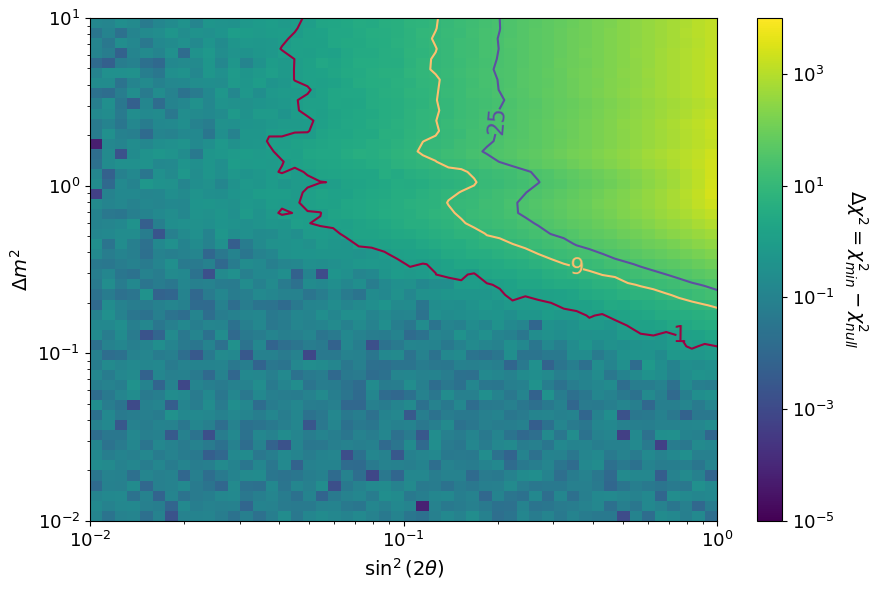

In [44]:
import matplotlib.colors as colors


dm2_edges = np.logspace(-2, 1, 51)
sin2_edges = np.logspace(-2, 0, 51)

dm2_cents = np.logspace(-2, 1, 50)
sin2_cents = np.logspace(-2, 0, 50)

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, delta_chi2min_median, shading='flat', cmap='viridis', norm=colors.LogNorm(vmin=1e-5, vmax=1e4))
X, Y = np.meshgrid(sin2_cents, dm2_cents)
CS = ax.contour(X, Y, delta_chi2min_median, levels=[1,  9,  25], cmap='Spectral')
ax.clabel(CS, inline=True, fontsize=16)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)

cb.set_label(r'$\Delta\chi^2 = \chi^2_{min} - \chi^2_{null}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)


plt.tight_layout()

In [12]:
np.min(delta_chi2min_median[delta_chi2min_median>0])

5.5397152749492307e-05